In [242]:
import os

In [243]:
os.chdir("E:\\Loan_AV")

In [244]:
import pandas as pd
import numpy as np

In [245]:
# Setting Max Columns and Rows for Outputs 
pd.options.display.max_columns=None
pd.options.display.max_rows=100

In [247]:
#Importing csv files/DataSets as DataFrame
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("test.csv")
print("Imported Successfully")

Imported Successfully


In [248]:
print("The shape of Train DataFrame is: ", train_df.shape )
print("The shape of Test DataFrame is: ",test_df.shape)

The shape of Train DataFrame is:  (614, 13)
The shape of Test DataFrame is:  (367, 12)


In [249]:
print("The Total Unique Entries in Train DataFrame is: ", len(train_df["Loan_ID"].unique()))
print("The Total Unique Entries in Test DataFrame is: ", len(test_df["Loan_ID"].unique()))

The Total Unique Entries in Train DataFrame is:  614
The Total Unique Entries in Test DataFrame is:  367


In [250]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [251]:
train_df["Property_Area"].nunique()
#test_df["Property_Area"].nunique()

3

In [252]:
train_df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [253]:
train_df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [254]:
test_df["Credit_History"].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [255]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [256]:
test_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [257]:
num_columns_train = [x for x in train_df.dtypes.index if train_df.dtypes[x]=='float64' or train_df.dtypes[x]=='int64']
num_columns_test = [x for x in test_df.dtypes.index if test_df.dtypes[x]=='float64' or test_df.dtypes[x]=='int64']

In [269]:
num_columns_train = num_columns_train + [ "Loan_Status" ] 

In [270]:
num_columns_train

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status']

In [259]:
num_columns_test

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [277]:
num_data_train = train_df[num_columns_train]
num_data_test = test_df[num_columns_test]

In [278]:
num_data_train.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,1025.0,1897.55,2877.5,3812.5,5795.00,14583.0,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,0.00,0.0,1188.5,2297.25,4997.4,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,30.0,56.00,100.0,128.0,168.00,297.8,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,84.0,180.00,360.0,360.0,360.00,360.0,480.0
Credit_History,564.0,0.842199,0.364878,0.0,0.0,0.00,1.0,1.0,1.00,1.0,1.0


In [279]:
num_data_test.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,999.22,1861.40,2864.00,3786.0,5060.0,10000.00,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,0.00,0.00,1025.0,2430.5,4335.60,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,38.05,64.05,100.25,125.0,158.0,239.75,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,74.40,180.00,360.00,360.0,360.0,360.00,480.0
Credit_History,338.0,0.825444,0.380150,0.0,0.00,0.00,1.00,1.0,1.0,1.00,1.0


In [280]:
corr = num_data_train.corr()*100
corr.style.background_gradient(cmap='coolwarm')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,100.000000,-11.660458,57.090904,-4.530609,-1.471488
CoapplicantIncome,-11.660458,100.000000,18.861940,-5.987801,-0.205628
LoanAmount,57.090904,18.861940,100.000000,3.944725,-0.843277
Loan_Amount_Term,-4.530609,-5.987801,3.944725,100.000000,0.147011
Credit_History,-1.471488,-0.205628,-0.843277,0.147011,100.000000


In [263]:
#Filter categorical variables
categorical_columns_train = [x for x in train_df.dtypes.index if train_df.dtypes[x]=='object']
categorical_columns_test = [x for x in test_df.dtypes.index if test_df.dtypes[x]=='object']

In [264]:
categorical_columns_train

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [265]:
categorical_columns_test

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

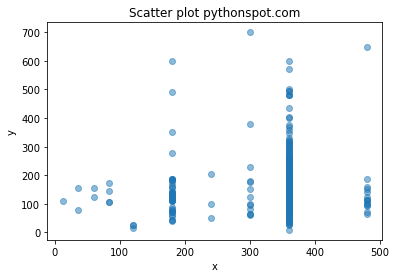

In [266]:
import matplotlib.pyplot as plt
plt.scatter(x=train_df.Loan_Amount_Term, y=train_df.LoanAmount, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

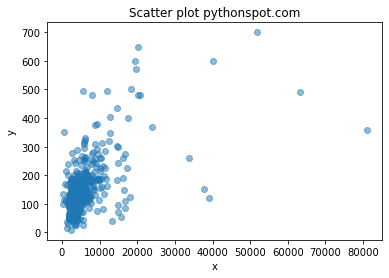

In [267]:
import matplotlib.pyplot as plt
plt.scatter(x=train_df.ApplicantIncome, y=train_df.LoanAmount, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

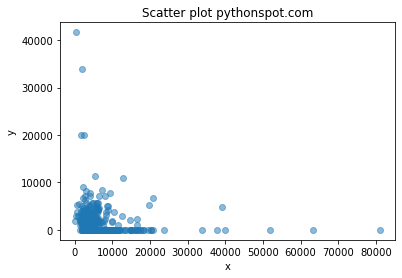

In [268]:
import matplotlib.pyplot as plt
plt.scatter(x=train_df.ApplicantIncome, y=train_df.CoapplicantIncome, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [87]:
categorical_columns_train = [x for x in categorical_columns_train if x not in ['Loan_ID']]

In [88]:
categorical_columns_test = [x for x in categorical_columns_test if x not in ['Loan_ID']]

In [89]:
for col in categorical_columns_train:
    print('\nFrequency of Categories for variable %s'%col)
    print(train_df[col].value_counts())


Frequency of Categories for variable Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency of Categories for variable Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency of Categories for variable Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of Categories for variable Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of Categories for variable Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of Categories for variable Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Frequency of Categories for variable Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


In [90]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [92]:
# Filling Missing Values with Hard_Coded Statistical Imputations

#Based on Mode Values
train_df["Gender"].fillna("Male",axis=0,inplace=True)
train_df["Married"].fillna("Yes",axis=0,inplace=True)
train_df["Dependents"].fillna(0,axis=0,inplace=True)
train_df["Self_Employed"].fillna("No",axis=0,inplace=True)
train_df["Credit_History"].fillna(1.0,axis=0,inplace=True)
train_df["Credit_History"].fillna(1.0,axis=0,inplace=True)

#Based on Average/Mean excluding Outliers in consideration to get the true means. 
train_df["LoanAmount"].fillna(147.0,axis=0,inplace=True)
train_df["Loan_Amount_Term"].fillna(360.0,axis=0,inplace=True)

In [93]:
#Same Intution as above
test_df["Gender"].fillna("Male",axis=0,inplace=True)
test_df["Dependents"].fillna(0,axis=0,inplace=True)
test_df["Self_Employed"].fillna("No",axis=0,inplace=True)
test_df["Credit_History"].fillna(1.0,axis=0,inplace=True)
test_df["LoanAmount"].fillna(136.0,axis=0,inplace=True)
test_df["Loan_Amount_Term"].fillna(360.0,axis=0,inplace=True)

In [96]:
train_df["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [97]:
#Since most of the our customer Base falls under YearlY loan Terms i.e.360
temp_df = train_df.loc[train_df["Loan_Amount_Term"]==360.0]

In [98]:
temp_df.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,99%,max
ApplicantIncome,526.0,5267.028517,5399.668565,150.0,1113.25,1876.25,2880.5,3848.0,5741.00,20791.5,81000.0
CoapplicantIncome,526.0,1566.760684,2507.800450,0.0,0.00,0.00,0.0,1250.0,2281.00,8761.5,33837.0
LoanAmount,526.0,146.410646,76.734164,9.0,37.00,60.25,104.0,130.0,165.75,480.0,600.0
Loan_Amount_Term,526.0,360.000000,0.000000,360.0,360.00,360.00,360.0,360.0,360.00,360.0,360.0
Credit_History,526.0,0.863118,0.344050,0.0,0.00,0.00,1.0,1.0,1.00,1.0,1.0


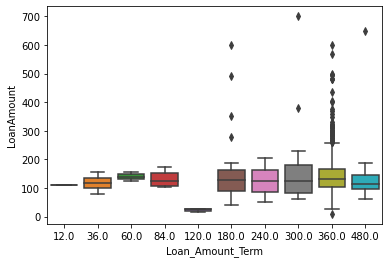

In [99]:
import seaborn as sns
sns.boxplot(x=train_df["Loan_Amount_Term"],y=train_df["LoanAmount"])

In [100]:
cleanup_nums = {"Gender":     {"Male": 1, "Female": 0},
                "Education": {"Graduate": 1, "Not Graduate": 0 },
                "Self_Employed": {"No":0,"Yes":1},
                "Loan_Status": {"Y":0,"N":1},
                "Married": {"No":0,"Yes":1},
                "Property_Area": {"Semiurban":1,"Urban":1,"Rural":0},
                "Loan_Status": {"Y":1,"N":0}}
               

In [101]:
train_df.replace(cleanup_nums, inplace=True)

In [102]:
test_df.replace(cleanup_nums, inplace=True)

In [103]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,147.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [104]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,1
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,1
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,1
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,1
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3+,0,1,4009,1777,113.0,360.0,1.0,1
363,LP002975,1,1,0,1,0,4158,709,115.0,360.0,1.0,1
364,LP002980,1,0,0,1,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0


In [105]:
train_df["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [106]:
train_df["Self_Employed"].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [107]:
train_df["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [108]:
train_ID = train_df.Loan_ID
test_ID = test_df.Loan_ID

In [109]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,147.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [110]:
train_df['Total_income']=train_df["ApplicantIncome"]+train_df["CoapplicantIncome"]
test_df['Total_income']=test_df["ApplicantIncome"]+test_df["CoapplicantIncome"]

In [111]:
train_df.drop(["ApplicantIncome","CoapplicantIncome"],axis=1,inplace=True)
test_df.drop(["ApplicantIncome","CoapplicantIncome"],axis=1,inplace=True)

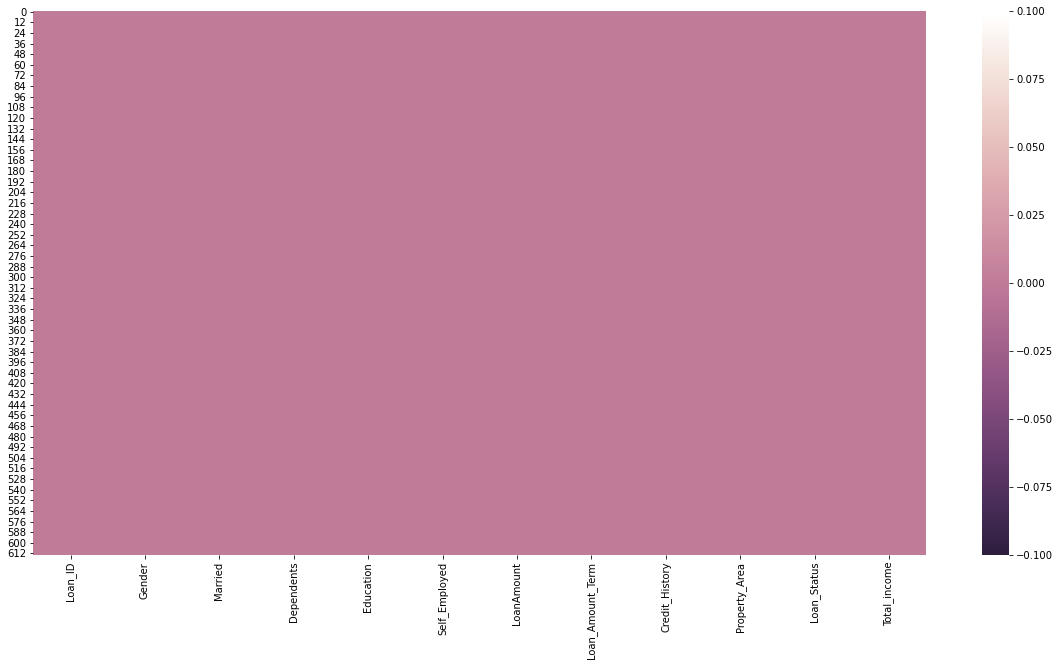

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(train_df.isnull(), cmap=cmap)

In [113]:
#Missing Values Percentage
train_df.isnull().sum()/train_df.shape[0]*100

Loan_ID             0.0
Gender              0.0
Married             0.0
Dependents          0.0
Education           0.0
Self_Employed       0.0
LoanAmount          0.0
Loan_Amount_Term    0.0
Credit_History      0.0
Property_Area       0.0
Loan_Status         0.0
Total_income        0.0
dtype: float64

In [114]:
#Missing Values Percentage
test_df.isnull().sum()/train_df.shape[0]*100

Loan_ID             0.0
Gender              0.0
Married             0.0
Dependents          0.0
Education           0.0
Self_Employed       0.0
LoanAmount          0.0
Loan_Amount_Term    0.0
Credit_History      0.0
Property_Area       0.0
Total_income        0.0
dtype: float64

In [115]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Total_income'],
      dtype='object')

In [116]:
test_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Total_income'],
      dtype='object')

In [117]:
train_df = pd.get_dummies(train_df, columns=['Dependents'])
train_df

,Loan_ID,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,Dependents_0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,1,0,1,0,147.0,360.0,1.0,1,1,5849.0,0,1,0,0,0
1,LP001003,1,1,1,0,128.0,360.0,1.0,0,0,6091.0,0,0,1,0,0
2,LP001005,1,1,1,1,66.0,360.0,1.0,1,1,3000.0,0,1,0,0,0
3,LP001006,1,1,0,0,120.0,360.0,1.0,1,1,4941.0,0,1,0,0,0
4,LP001008,1,0,1,0,141.0,360.0,1.0,1,1,6000.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,1,0,71.0,360.0,1.0,0,1,2900.0,0,1,0,0,0
610,LP002979,1,1,1,0,40.0,180.0,1.0,0,1,4106.0,0,0,0,0,1
611,LP002983,1,1,1,0,253.0,360.0,1.0,1,1,8312.0,0,0,1,0,0
612,LP002984,1,1,1,0,187.0,360.0,1.0,1,1,7583.0,0,0,0,1,0


In [118]:
test_df = pd.get_dummies(test_df, columns=['Dependents'])
test_df

,Loan_ID,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income,Dependents_0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,LP001015,1,1,1,0,110.0,360.0,1.0,1,5720,0,1,0,0,0
1,LP001022,1,1,1,0,126.0,360.0,1.0,1,4576,0,0,1,0,0
2,LP001031,1,1,1,0,208.0,360.0,1.0,1,6800,0,0,0,1,0
3,LP001035,1,1,1,0,100.0,360.0,1.0,1,4886,0,0,0,1,0
4,LP001051,1,0,0,0,78.0,360.0,1.0,1,3276,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,0,1,113.0,360.0,1.0,1,5786,0,0,0,0,1
363,LP002975,1,1,1,0,115.0,360.0,1.0,1,4867,0,1,0,0,0
364,LP002980,1,0,1,0,126.0,360.0,1.0,1,5243,0,1,0,0,0
365,LP002986,1,1,1,0,158.0,360.0,1.0,0,7393,0,1,0,0,0


In [119]:
#Dropping Un
train_df.drop(["Dependents_0"], axis=1,inplace=True)
test_df.drop(["Dependents_0"], axis=1,inplace=True)

In [121]:
# TArget Variable
target = train_df.Loan_Status

In [122]:
train_df.drop(['Loan_ID'],axis=1,inplace=True)

In [123]:
test_df.drop(['Loan_ID'],axis=1,inplace=True)

In [124]:
test_df.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_income',
       'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')

In [125]:
train_df.drop(['Loan_Status'],axis=1,inplace=True)

In [126]:
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [241]:
train_df.corr()*100

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income,Dependents_1,Dependents_2,Dependents_3+
Gender,100.000000,36.456860,-4.536391,-0.052499,10.795965,-7.402956,0.916985,-8.028345,9.319076,-0.446601,12.995276,9.631874
Married,36.456860,100.000000,-1.230438,0.448875,14.715649,-10.091179,1.093809,0.680550,8.331915,11.385315,24.954731,13.256640
Education,-4.536391,-1.230438,100.000000,1.038310,16.693737,7.392786,7.365778,7.751962,16.136246,1.335466,-2.082150,-5.528841
Self_Employed,-0.052499,0.448875,1.038310,100.000000,11.526206,-3.373943,-0.155046,-2.206516,11.300049,8.204363,3.243413,0.327760
LoanAmount,10.795965,14.715649,16.693737,11.526206,100.000000,3.645836,-0.145686,-4.316732,62.007839,6.236934,1.952785,15.320714
Loan_Amount_Term,-7.402956,-10.091179,7.392786,-3.373943,3.645836,100.000000,-0.470498,-3.432109,-7.091718,-8.849227,-1.060850,-7.727306
Credit_History,0.916985,1.093809,7.365778,-0.155046,-0.145686,-0.470498,100.000000,2.090592,-1.256321,0.975747,0.798727,-6.047276
Property_Area,-8.028345,0.680550,7.751962,-2.206516,-4.316732,-3.432109,2.090592,100.000000,-1.738689,8.411676,0.429806,-4.066950
Total_income,9.319076,8.331915,16.136246,11.300049,62.007839,-7.091718,-1.256321,-1.738689,100.000000,2.516197,-2.823671,16.700335
Dependents_1,-0.446601,11.385315,1.335466,8.204363,6.236934,-8.849227,0.975747,8.411676,2.516197,100.000000,-19.804647,-13.433711


In [198]:
# Splitting the dataset into the Training set and Test setfrom sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_df, target, test_size = 0.25, random_state = 42)

In [199]:
X_train.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_income',
       'Dependents_1', 'Dependents_2', 'Dependents_3+'],
      dtype='object')

In [200]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Logistic Regression

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [204]:
lm = LogisticRegression()

In [208]:
lm.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [211]:
pred_lm = lm.predict(X_test)

In [216]:
print(classification_report(Y_test,pred_lm))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



In [218]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
print("Precision :" ,precision_score(Y_test ,pred_lm, average='binary'))
print('\n')
print("Recall :" ,recall_score(Y_test ,pred_lm, average='binary'))
print('\n')
print("F1 score :" ,f1_score(Y_test ,pred_lm, average='binary'))
print('\n')
print("ROC_AUC_Score" ,roc_auc_score(Y_test ,pred_lm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(Y_test,pred_lm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(Y_test,pred_lm,average=None))
print('\n')
print('Train Accuracy: ',accuracy_score(Y_test, lm.predict(X_test))*100,'%')

Precision : 0.7480916030534351


Recall : 0.98


F1 score : 0.8484848484848484


ROC_AUC_Score 0.6844444444444444


Jaccard Similarity Score :  77.27 %


F1-SCORE :  [0.54545455 0.84848485]


Train Accuracy:  77.27272727272727 %


E:\work_table\conda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Decision Trees

In [221]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()

In [231]:
parameter_grid = {'max_depth': [3, 4, 6, 8,9 ],
                  'max_features': [5,6,7,8,9,10],
                 'random_state':[0,15,20,35,50,80,100,150,180,200],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(dtree, param_grid = parameter_grid,
                          cv =10)

grid_search.fit(X_train, Y_train)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.8369565217391305
Best params: {'criterion': 'gini', 'max_depth': 4, 'max_features': 7, 'random_state': 15}


In [232]:
dtree=DecisionTreeClassifier(max_depth=4,criterion='gini',max_features=7,random_state=15)

dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [233]:
pred_Dtree = dtree.predict(X_test)

In [234]:
from sklearn.metrics import confusion_matrix
mm = confusion_matrix(Y_test, pred_Dtree)
mm

array([[22, 32],
       [ 3, 97]], dtype=int64)

In [235]:
print("Precision :" ,precision_score(Y_test ,pred_Dtree, average='binary'))
print("Recall :" ,recall_score(Y_test ,pred_Dtree, average='binary'))
print("F1 score :" ,f1_score(Y_test ,pred_Dtree, average='binary'))
print("ROC_AUC_Score" ,roc_auc_score(Y_test ,pred_Dtree))

Precision : 0.751937984496124
Recall : 0.97
F1 score : 0.8471615720524017
ROC_AUC_Score 0.6887037037037037


In [131]:
from sklearn.ensemble import RandomForestClassifier
model_ = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
model_.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [132]:
model_.score(X_train, Y_train)

0.9847826086956522

In [133]:
Y_predd = model_.predict(X_test)

In [134]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_predd))

              precision    recall  f1-score   support

           0       0.88      0.52      0.65        54
           1       0.79      0.96      0.86       100

    accuracy                           0.81       154
   macro avg       0.83      0.74      0.76       154
weighted avg       0.82      0.81      0.79       154



In [135]:
from sklearn.metrics import confusion_matrix
mm = confusion_matrix(Y_test, Y_predd)
mm

array([[28, 26],
       [ 4, 96]], dtype=int64)

In [136]:
print("Precision :" ,precision_score(Y_test ,Y_predd, average='binary'))
print("Recall :" ,recall_score(Y_test ,Y_predd, average='binary'))
print("F1 score :" ,f1_score(Y_test ,Y_predd, average='binary'))
print("ROC_AUC_Score" ,roc_auc_score(Y_test ,Y_predd))

Precision : 0.7868852459016393
Recall : 0.96
F1 score : 0.8648648648648649
ROC_AUC_Score 0.7392592592592593


In [138]:
#Though not a bad score But here we can see LoanAmount,Total_Income and Credit_History came to most imprtant parameters
pd.DataFrame({'feature': list(train_df.columns),
                   'importance': model_.feature_importances_}).\
                    sort_values('importance', ascending = False)

,feature,importance
4,LoanAmount,0.252214
8,Total_income,0.247070
6,Credit_History,0.241391
5,Loan_Amount_Term,0.039063
3,Self_Employed,0.034050
9,Dependents_1,0.032986
1,Married,0.031289
7,Property_Area,0.027753
0,Gender,0.025073
10,Dependents_2,0.024528


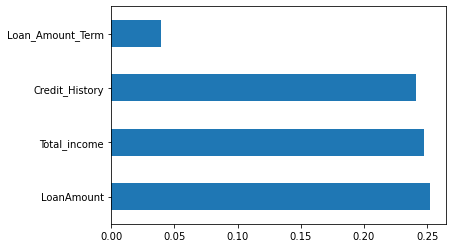

In [139]:
feat_importances = pd.Series(model_.feature_importances_, index=train_df.columns)
feat_importances.nlargest(4).plot(kind='barh')

In [140]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [141]:
rf.score(X_train, Y_train)

1.0

In [142]:
y_pred = rf.predict(X_test)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.672962962962963

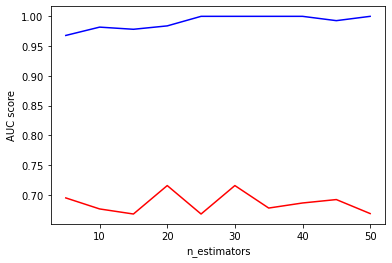

In [143]:

n_estimators = [5,10,15,20,25,30,35,40,45,50 ]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, Y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(n_estimators, train_results,"b" , label="Train AUC")
line2 = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

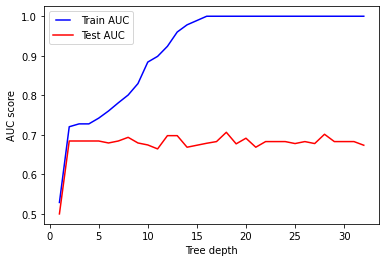

In [144]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, Y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

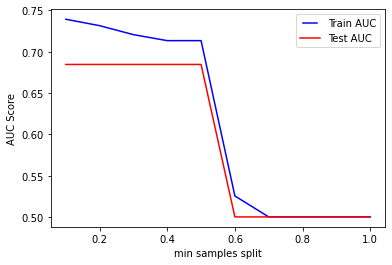

In [145]:

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(X_train, Y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("min samples split")
plt.show()

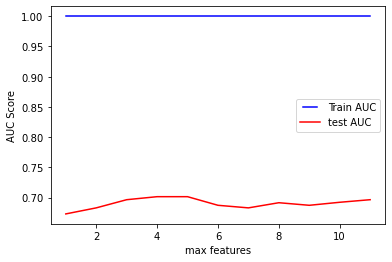

In [146]:
max_features = list(range(1,X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(X_train, Y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results,"b", label="Train AUC")
line2, = plt.plot(max_features, test_results, "r", label="test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("max features")
plt.show()


In [147]:
fit_rf1 = RandomForestClassifier(random_state=42, n_estimators=35, max_depth=6,max_features=9 ,min_samples_split=0.6)
fit_rf1.fit(X_train, Y_train)
train_pred = fit_rf1.predict(X_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
roc_auc1 = auc(false_positive_rate, true_positive_rate)
y_pred = fit_rf1.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc2 = auc(false_positive_rate, true_positive_rate)
print("Train", roc_auc1)
print("Test", roc_auc2)

Train 0.7132505175983437
Test 0.6844444444444444


In [148]:
from sklearn.model_selection import GridSearchCV
import time
fit_rf = RandomForestClassifier(random_state=42)
start = time.time()
param_dist = {'max_depth':[5,6,7,8,10],
              'min_samples_split':[0.4,0.5,0.6,0.7],
              'n_estimators':[35, 40, 45, 50],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = -1, verbose=1)

cv_rf.fit(X_train, Y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 1496 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 2396 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 3496 tasks      | elapsed:  1.4min


Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_split': 0.4, 'n_estimators': 35}
Time taken in grid search:  110.16


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  1.8min finished


In [149]:
cv_rf.best_score_

0.826086956521739

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_df, target, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train) 

In [150]:
model = RandomForestClassifier(n_estimators=35,
                               bootstrap=True, criterion='gini',
                               min_samples_split=0.4,
                               max_depth=5, max_features=None)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.4,
                       min_weight_fraction_leaf=0.0, n_estimators=35,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
y_pred_train =model.predict(X_train)

In [162]:
print("Precision :" ,precision_score(Y_train ,y_pred_train, average='binary'))
print("Recall :" ,recall_score(Y_train ,y_pred_train, average='binary'))
print("F1 score :" ,f1_score(Y_train ,y_pred_train, average='binary'))
print("ROC_AUC_Score" ,roc_auc_score(Y_train ,y_pred_train))

Precision : 0.8123393316195373
Recall : 0.9813664596273292
F1 score : 0.8888888888888888
ROC_AUC_Score 0.726190476190476


In [152]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.47      0.62       138
           1       0.81      0.98      0.89       322

    accuracy                           0.83       460
   macro avg       0.86      0.73      0.76       460
weighted avg       0.84      0.83      0.81       460



In [163]:
y_pred_test =model.predict(X_test)

In [164]:
print("Precision :" ,precision_score(Y_test ,y_pred_test, average='binary'))
print("Recall :" ,recall_score(Y_test ,y_pred_test, average='binary'))
print("F1 score :" ,f1_score(Y_test ,y_pred_test, average='binary'))
print("ROC_AUC_Score" ,roc_auc_score(Y_test ,y_pred_test))

Precision : 0.7480916030534351
Recall : 0.98
F1 score : 0.8484848484848484
ROC_AUC_Score 0.6844444444444444


## Since it's a Loan Fraud Detection Problem , the model is showing an excellent Recall score which may  be useful in Business Scenario where focus is to reduce Default Number.
### However on contrary the Bank may lose Opportunity Cost in terms of the Loan Applicants who were not about to default the loan , still lost the chance to avail one. 

In [167]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
Final_Test = scale.fit_transform(test_df) 

In [179]:
Final_Test_Predict = model_.predict(Final_Test)

In [180]:
sample_submission = pd.DataFrame()

sample_submission [ "Loan_ID" ] = test_ID
sample_submission [ "Loan_Status" ] = Final_Test_Predict 

In [181]:
sample_submission.Loan_Status.value_counts()

1    282
0     85
Name: Loan_Status, dtype: int64

In [159]:
sample_submission.to_csv("sample_submission.csv")